<a href="https://colab.research.google.com/github/theekshaya4/Image-colorization/blob/main/Copy_of_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade torch torchvision torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 130.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.

In [ ]:
import torch

print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0))


Torch version: 2.9.0+cu126
CUDA available: True
GPU name: Tesla T4


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

print("Torch:", torch.__version__)
print("Torchvision:", torchvision.__version__)
print("CUDA:", torch.cuda.is_available())

Torch: 2.9.0+cu126
Torchvision: 0.24.0+cu126
CUDA: True


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))
else:
    print("Using CPU")

Device: cuda
GPU name: Tesla T4


In [ ]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=False, num_workers=2)

100%|██████████| 170M/170M [00:05<00:00, 29.6MB/s]


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the Colorization Model
class ColorizationNet(nn.Module):
    def __init__(self):
        super(ColorizationNet, self).__init__()

        self.conv1 = nn.Conv2d(1, 64, kernel_size=5, stride=1, padding=4, dilation=2)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=4, dilation=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=4, dilation=2)
        self.conv4 = nn.Conv2d(128, 3, kernel_size=5, stride=1, padding=4, dilation=2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = torch.sigmoid(self.conv4(x))
        return x


# Test the model
if __name__ == "__main__":
    model = ColorizationNet()
    input_image = torch.randn(1, 1, 64, 64)  # grayscale image
    output = model(input_image)
    print(output.shape)

torch.Size([1, 3, 64, 64])


In [ ]:
# Model
model = ColorizationNet().to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert RGB image to grayscale
def rgb_to_gray(img):
    return img.mean(dim=1, keepdim=True)

In [ ]:
# Training loop
EPOCHS = 30

for epoch in range(EPOCHS):
    for i, (images, _) in enumerate(train_loader):

        grayscale_images = rgb_to_gray(images).to(device)
        images = images.to(device)

        # Forward pass
        outputs = model(grayscale_images)
        loss = criterion(outputs, images)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print statistics
        if i % 100 == 0:
            print(
                f"Epoch [{epoch+1}/{EPOCHS}], "
                f"Step [{i+1}/{len(train_loader)}], "
                f"Loss: {loss.item():.4f}"
            )

print("Finished Training")

Epoch [1/30], Step [1/782], Loss: 0.0639
Epoch [1/30], Step [101/782], Loss: 0.0086
Epoch [1/30], Step [201/782], Loss: 0.0055
Epoch [1/30], Step [301/782], Loss: 0.0053
Epoch [1/30], Step [401/782], Loss: 0.0051
Epoch [1/30], Step [501/782], Loss: 0.0051
Epoch [1/30], Step [601/782], Loss: 0.0043
Epoch [1/30], Step [701/782], Loss: 0.0060
Epoch [2/30], Step [1/782], Loss: 0.0084
Epoch [2/30], Step [101/782], Loss: 0.0047
Epoch [2/30], Step [201/782], Loss: 0.0050
Epoch [2/30], Step [301/782], Loss: 0.0063
Epoch [2/30], Step [401/782], Loss: 0.0058
Epoch [2/30], Step [501/782], Loss: 0.0065
Epoch [2/30], Step [601/782], Loss: 0.0052
Epoch [2/30], Step [701/782], Loss: 0.0063
Epoch [3/30], Step [1/782], Loss: 0.0052
Epoch [3/30], Step [101/782], Loss: 0.0047
Epoch [3/30], Step [201/782], Loss: 0.0041
Epoch [3/30], Step [301/782], Loss: 0.0055
Epoch [3/30], Step [401/782], Loss: 0.0043
Epoch [3/30], Step [501/782], Loss: 0.0062
Epoch [3/30], Step [601/782], Loss: 0.0045
Epoch [3/30], Ste

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()

    if len(img.shape) == 2:
        plt.imshow(npimg, cmap='gray')
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
def visualize_all_three(original_images, grayscale_images, colorized_images, n=5):
    """
    Display original, grayscale, and colorized images side by side.
    """
    fig = plt.figure(figsize=(3 * n, 4))

    for i in range(n):
        ax = plt.subplot(1, 3 * n, 3 * i + 1)
        imshow(original_images[i])
        ax.set_title("Original")
        ax.axis("off")

        ax = plt.subplot(1, 3 * n, 3 * i + 2)
        imshow(grayscale_images[i])
        ax.set_title("Grayscale")
        ax.axis("off")

        ax = plt.subplot(1, 3 * n, 3 * i + 3)
        imshow(colorized_images[i])
        ax.set_title("Colorized")
        ax.axis("off")

    plt.tight_layout()
    plt.show()
def torch_rgb_to_hsv(rgb):
    """
    Convert an RGB image tensor to HSV.
    rgb: (batch_size, 3, height, width), range [0, 1]
    """
    r, g, b = rgb[:, 0, :, :], rgb[:, 1, :, :], rgb[:, 2, :, :]

    max_val, _ = torch.max(rgb, dim=1)
    min_val, _ = torch.min(rgb, dim=1)
    diff = max_val - min_val

    h = torch.zeros_like(max_val)

    mask = (max_val == r) & (g >= b)
    h[mask] = (g[mask] - b[mask]) / diff[mask]

    mask = (max_val == r) & (g < b)
    h[mask] = (g[mask] - b[mask]) / diff[mask] + 6.0

    mask = max_val == g
    h[mask] = (b[mask] - r[mask]) / diff[mask] + 2.0

    mask = max_val == b
    h[mask] = (r[mask] - g[mask]) / diff[mask] + 4.0

    h = h / 6.0
    h[diff == 0.0] = 0.0

    s = torch.zeros_like(max_val)
    s[diff != 0.0] = diff[diff != 0.0] / max_val[diff != 0.0]

    v = max_val

    return torch.stack([h, s, v], dim=1)
def torch_hsv_to_rgb(hsv):
    """
    Convert an HSV image tensor to RGB.
    hsv: (batch_size, 3, height, width), range [0, 1]
    """
    h, s, v = hsv[:, 0, :, :], hsv[:, 1, :, :], hsv[:, 2, :, :]

    i = torch.floor(h * 6.0)
    f = h * 6.0 - i

    p = v * (1.0 - s)
    q = v * (1.0 - s * f)
    t = v * (1.0 - s * (1.0 - f))

    i_mod = i % 6

    r = torch.zeros_like(h)
    g = torch.zeros_like(h)
    b = torch.zeros_like(h)

    r[i_mod == 0] = v[i_mod == 0]
    g[i_mod == 0] = t[i_mod == 0]
    b[i_mod == 0] = p[i_mod == 0]

    r[i_mod == 1] = q[i_mod == 1]
    g[i_mod == 1] = v[i_mod == 1]
    b[i_mod == 1] = p[i_mod == 1]

    r[i_mod == 2] = p[i_mod == 2]
    g[i_mod == 2] = v[i_mod == 2]
    b[i_mod == 2] = t[i_mod == 2]

    r[i_mod == 3] = p[i_mod == 3]
    g[i_mod == 3] = q[i_mod == 3]
    b[i_mod == 3] = v[i_mod == 3]

    r[i_mod == 4] = t[i_mod == 4]
    g[i_mod == 4] = p[i_mod == 4]
    b[i_mod == 4] = v[i_mod == 4]

    r[i_mod == 5] = v[i_mod == 5]
    g[i_mod == 5] = p[i_mod == 5]
    b[i_mod == 5] = q[i_mod == 5]

    return torch.stack([r, g, b], dim=1)
def exaggerate_colors(images, saturation_factor=1.5, value_factor=1.2):
    """
    Exaggerate colors of RGB images.
    images: (batch_size, 3, height, width), range [-1, 1]
    """
    images = (images + 1) / 2.0

    images_hsv = torch_rgb_to_hsv(images)

    images_hsv[:, 1, :, :] = torch.clamp(
        images_hsv[:, 1, :, :] * saturation_factor, 0, 1
    )

    images_hsv[:, 2, :, :] = torch.clamp(
        images_hsv[:, 2, :, :] * value_factor, 0, 1
    )

    color_exaggerated_images = torch_hsv_to_rgb(images_hsv)

    color_exaggerated_images = color_exaggerated_images * 2.0 - 1.0

    return color_exaggerated_images

In [ ]:
import os
current_directory=os.getcwd()
print("current working directory:",current_directory)

current working directory: /content


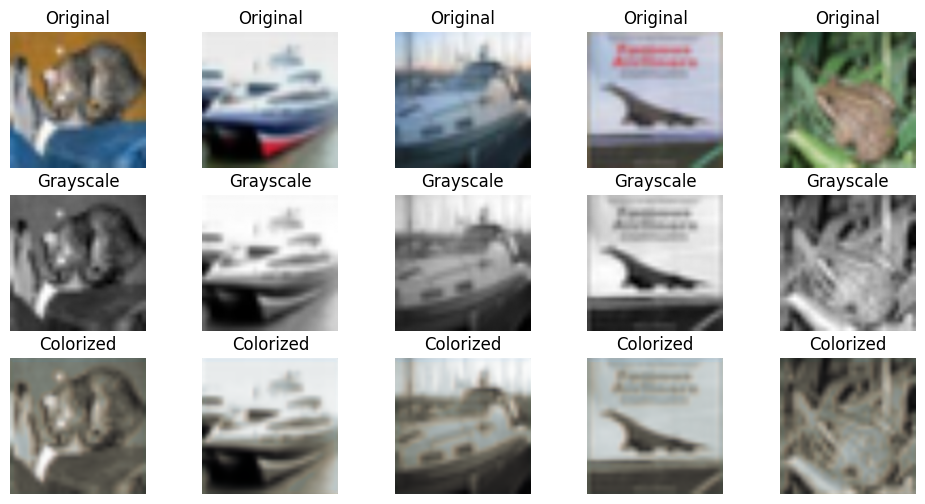

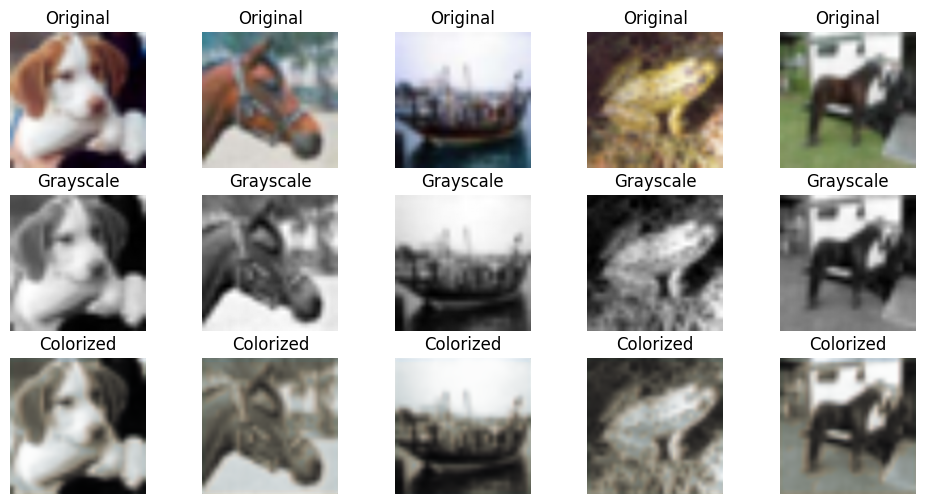

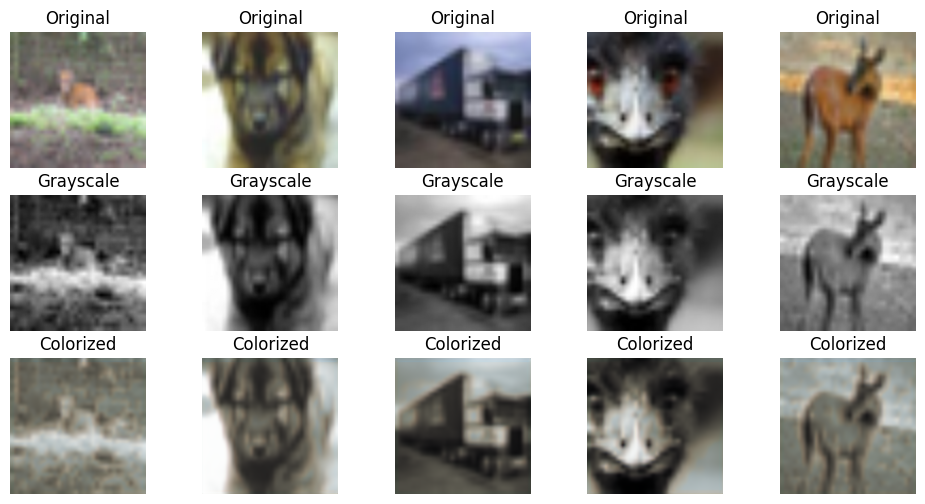

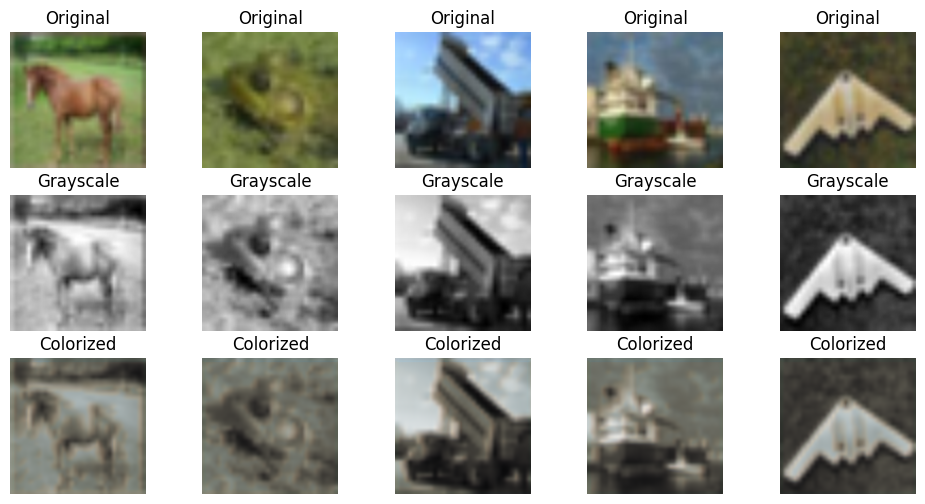

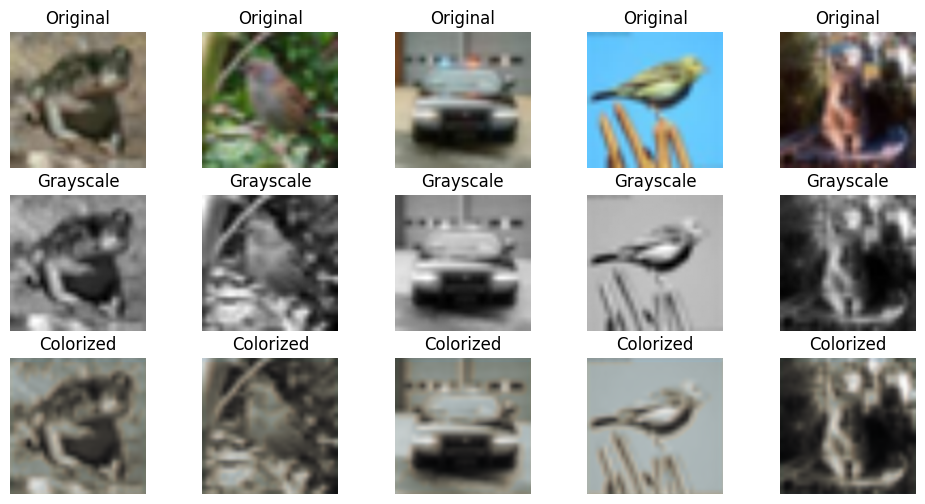

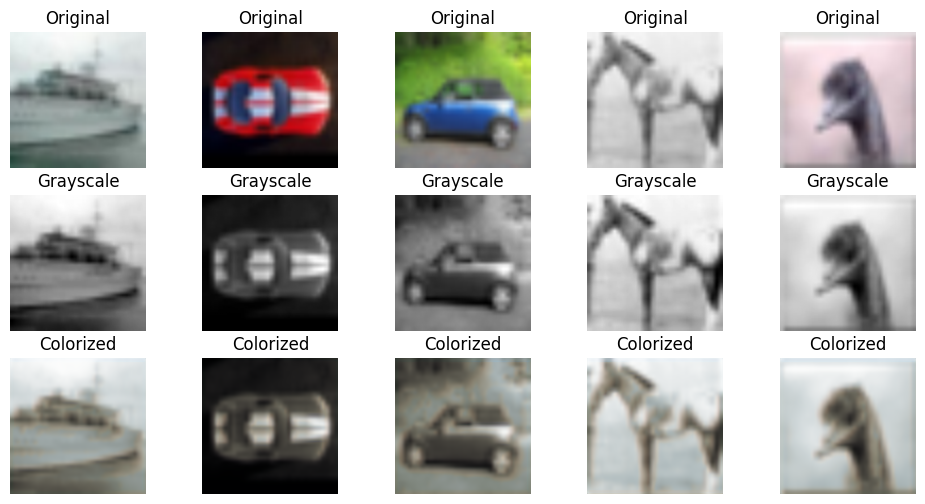

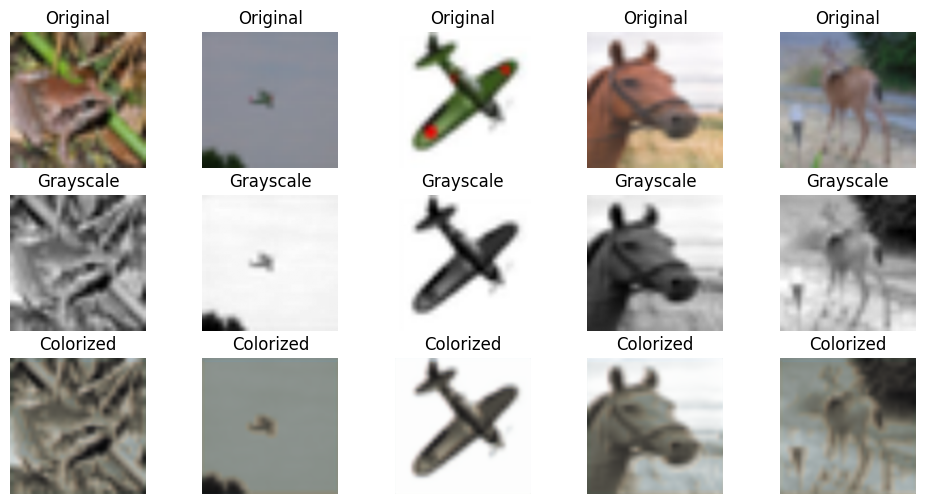

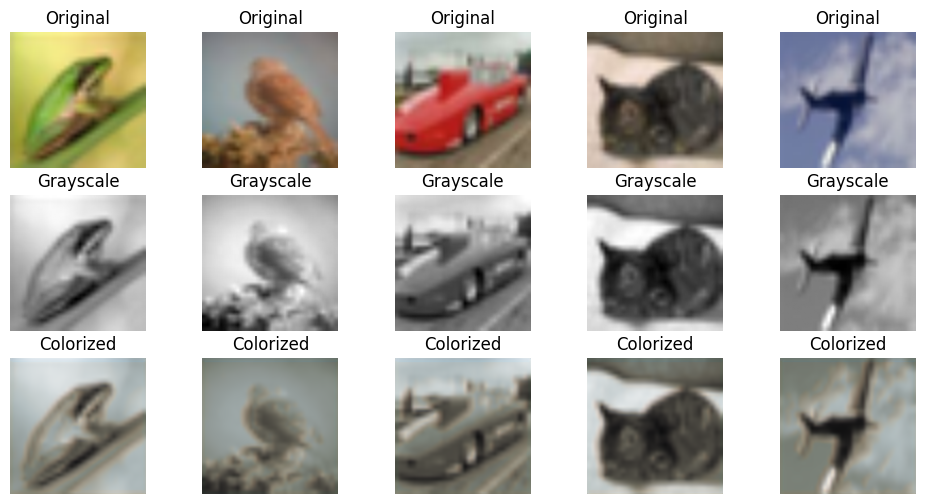

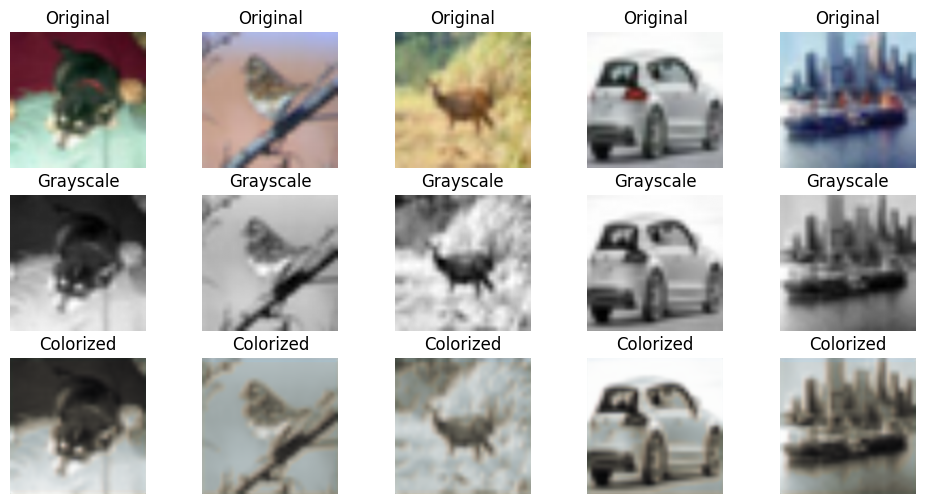

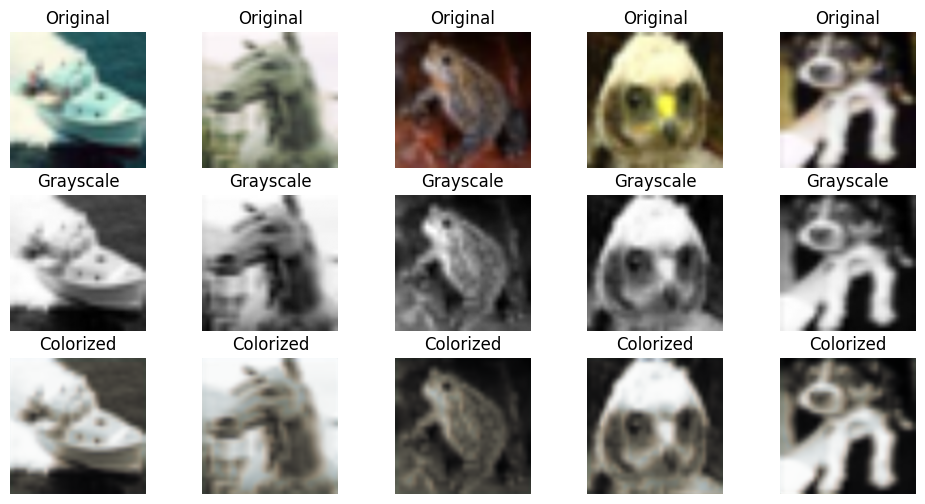

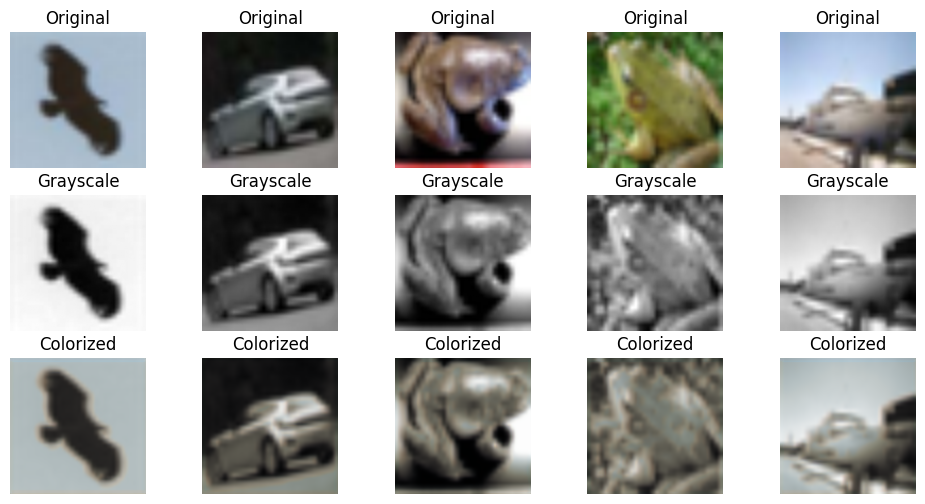

In [ ]:
with torch.no_grad():
    for i, (images, _) in enumerate(test_loader):

        images = images.to(device)

        grayscale_images = rgb_to_gray(images).unsqueeze(1).to(device)
        colorized_images = model(grayscale_images)

        visualize_all(
            images.cpu(),
            grayscale_images.cpu().squeeze(1),
            colorized_images.cpu()
        )

        if i == 10:
            break

In [ ]:
import os
current_directory=os.getcwd()
print("Current working directory:",current_directory)

Current working directory: /content
